In [1]:
%matplotlib inline

In [2]:
import numpy as np
import kali.carma
import kali
import gatspy
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [14,8]
from lsstlc import * # derived LSST lightcurve sub-class

/home/kali/python/kali/lc.py:29: UserWarning: No display environment! Using matplotlib backend "Agg"
  warnings.warn('No display environment! Using matplotlib backend "Agg"')
/home/conda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
c21 = extLC('./c_2_1_temp_lc.npz')

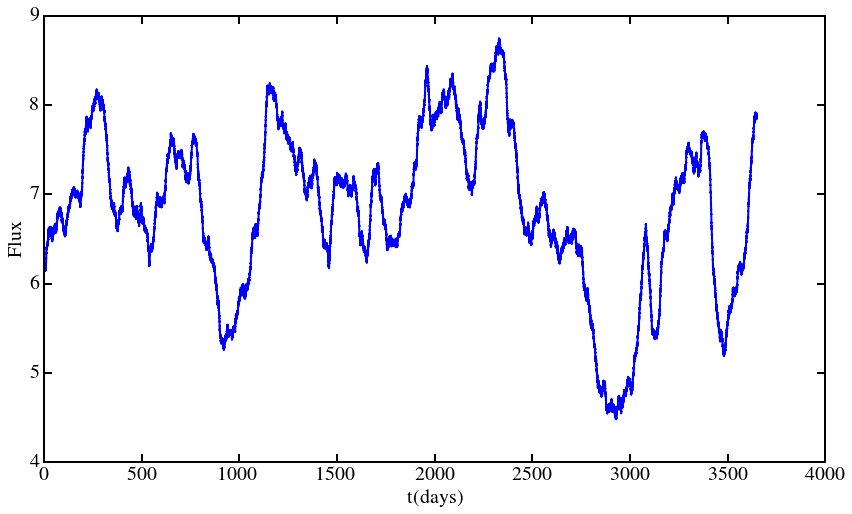

In [5]:
# now plot the mock lc
f = plt.figure(figsize=(14,8))
plt.ylabel('Flux')
plt.xlabel('t(days)')
# plt.xlim(0,2000)

# np.mean(LC.y) - np.mean(LC.x) gives the mean flux
plt.plot(c21.t, c21.x - np.mean(c21.x) + np.mean(c21.y))

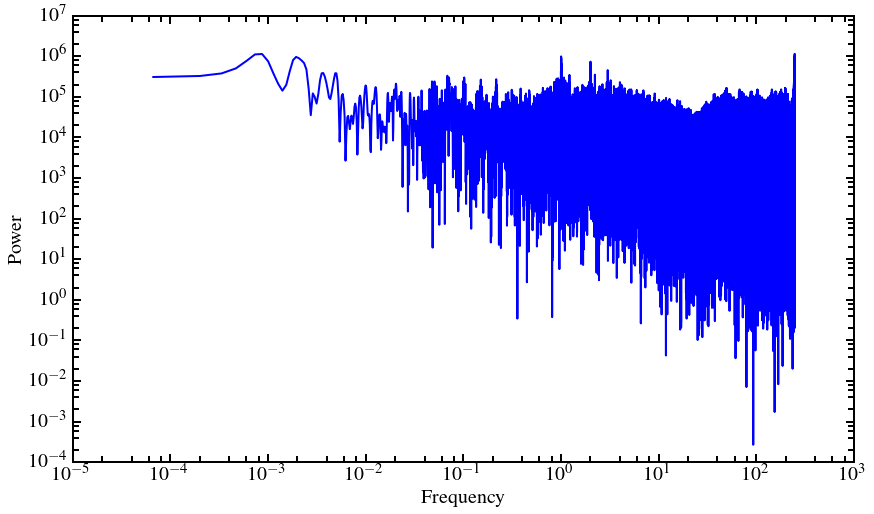

In [21]:
# plot periodogram using astropy
f, psd_sb, err = dLC.periodogram_sb()
#ratio = psdM[0]/psd_sb[0]
fig = plt.figure(figsize=(14,8))
plt.ylabel('Power')
plt.xlabel('Frequency')
plt.loglog(f, psd_sb)
#plt.loglog(freqsM, psdM/ratio)

In [19]:
freqs, psd, psdnumerator, psddenominator, psdnumeratorcomponent, psddenominatorcomponent = Task.psd(start=1/DRW_lc.T, stop=1/DRW_lc.mindt)

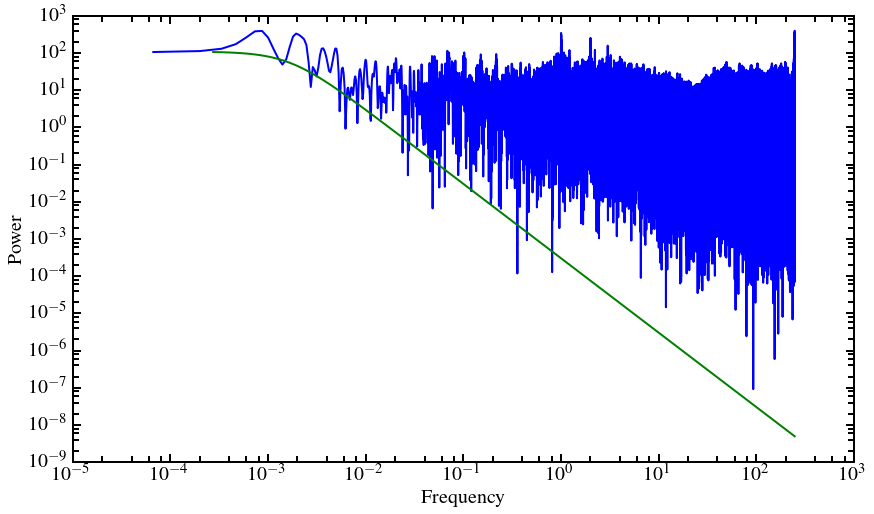

In [22]:
fig = plt.figure(figsize=(14,8))
plt.ylabel('Power')
plt.xlabel('Frequency')
ratio = psd[0]/psd_sb[0]
plt.loglog(f, psd_sb*ratio)
plt.loglog(freqs, psd)

In [12]:
from astropy import stats

In [13]:
ls = stats.LombScargle(DRW_lc.t, DRW_lc.y, DRW_lc.yerr, nterms=1)

In [24]:
f, psd_mock = ls.autopower(method='fast', normalization='psd', maximum_frequency=1/DRW_lc.mindt)

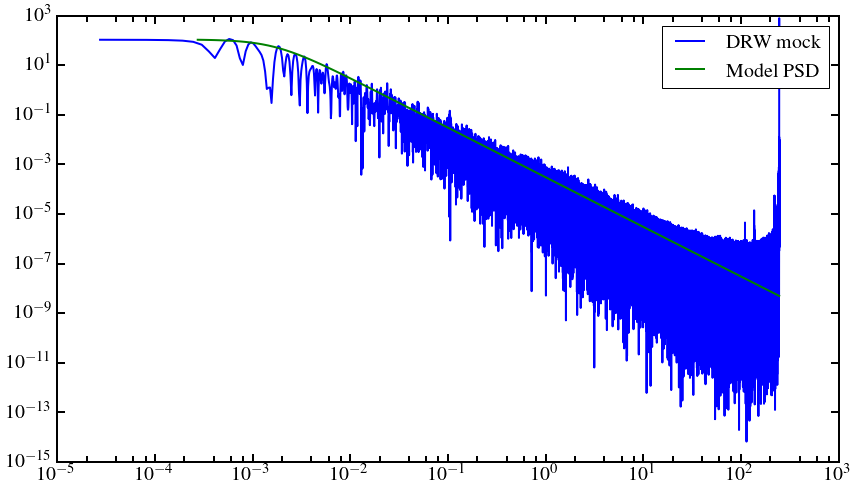

In [25]:
fig = plt.figure(figsize=(14,8))
ratio = psd[0]/psd_mock[0]
plt.loglog(f, psd_mock*ratio, label='DRW mock')
plt.loglog(freqs, psd, label='Model PSD')
plt.legend()